In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing = housing.dropna()

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

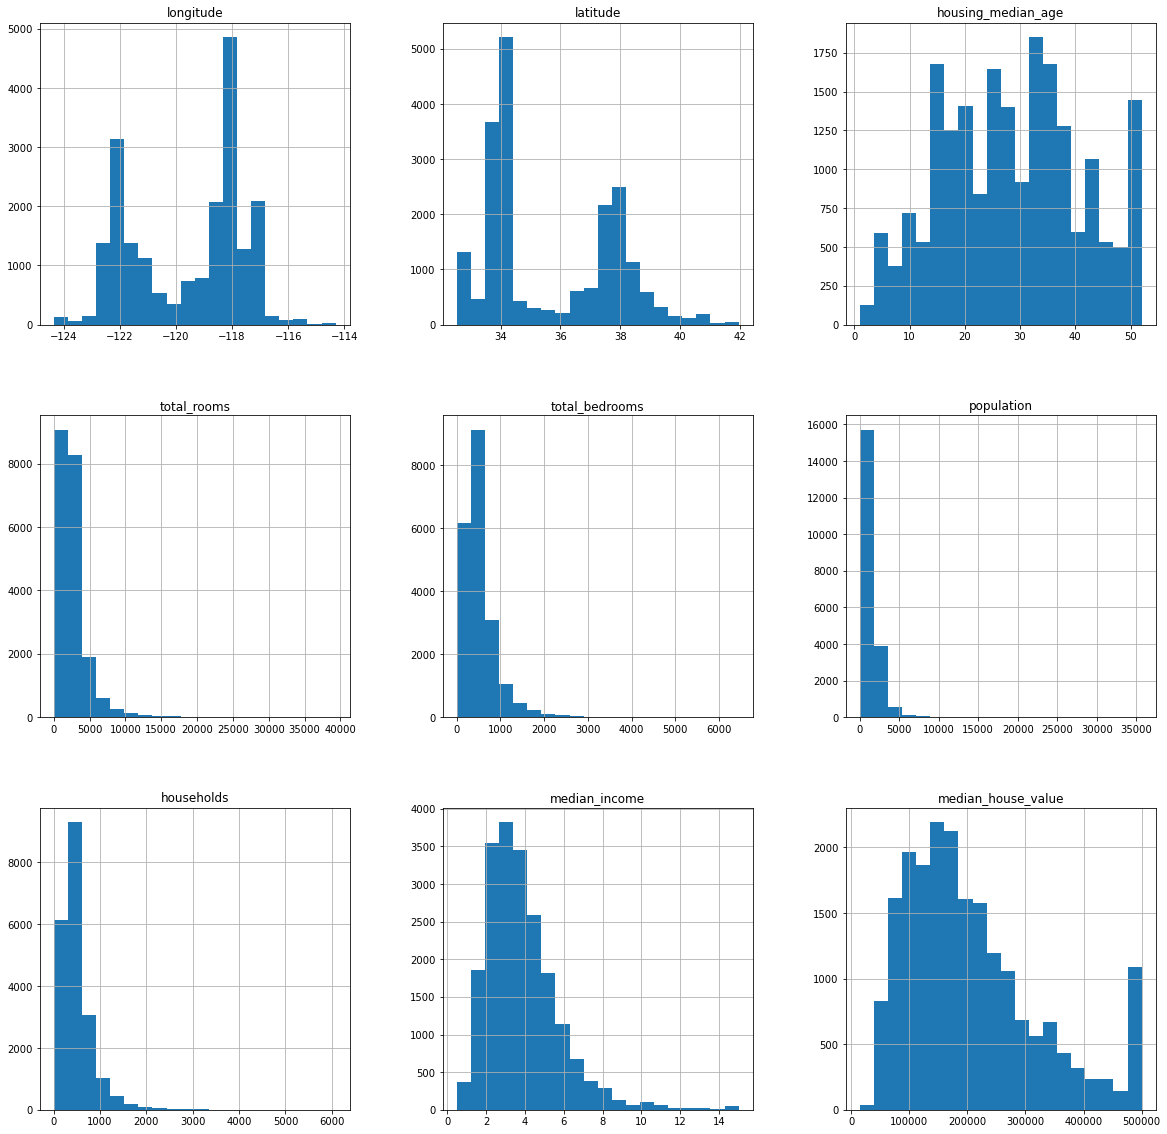

In [8]:
housing.hist(bins = 20, figsize = (20, 20))
plt.show()

/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


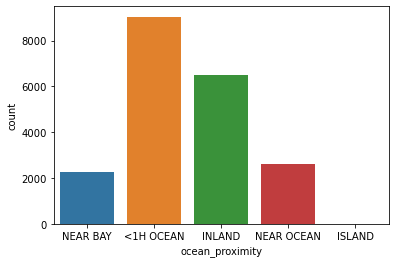

In [9]:
sns.countplot(housing['ocean_proximity'])
plt.show()

In [10]:
housing[housing['ocean_proximity'] == "ISLAND"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [11]:
oceanProximity = housing['ocean_proximity']
housing = housing.drop(['ocean_proximity'], axis = 1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
log_columns = ['households', 'population', 'total_rooms', 'total_bedrooms', 'median_income']
housing[log_columns] = housing[log_columns].apply(np.log)

z_scores = scipy.stats.zscore(housing)
filtered_entries = (np.abs(z_scores) < 5).all(axis=1)
housing = housing[filtered_entries]

oceanProximity = oceanProximity[filtered_entries]

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000
mean,-119.571274,35.633275,28.625246,7.644719,6.066642,7.038119,5.996125,1.245501,206877.380552
std,2.003017,2.136536,12.579072,0.707432,0.689531,0.700305,0.691051,0.467838,115343.473595
min,-124.350000,32.540000,1.000000,3.871201,2.397895,3.332205,2.397895,-0.693347,14999.000000
25%,-121.800000,33.930000,18.000000,7.285335,5.693732,6.674561,5.641907,0.942251,119700.000000
50%,-118.500000,34.260000,29.000000,7.664347,6.077642,7.063048,6.016157,1.263420,179800.000000
75%,-118.010000,37.720000,37.000000,8.054840,6.473891,7.453127,6.406880,1.556833,264700.000000
max,-114.310000,41.950000,52.000000,10.579489,8.771060,10.482402,8.713089,2.708057,500001.000000


In [ ]:
housing.hist(bins = 20, figsize = (20, 20))
plt.show()

In [ ]:
tmp = housing['median_house_value']
housing = housing.drop('median_house_value', axis = 1)
housing = (housing - housing.mean()) / housing.std()
housing['median_house_value'] = tmp
housing.hist(bins = 20, figsize = (20, 20))
plt.show()

In [ ]:
cols = [c for c in housing.columns if not "ocean" in c]
sns.pairplot(housing[cols], palette = 'seaborn')
plt.show()

In [ ]:
len(housing)

In [ ]:
len(oceanProximity)

In [ ]:
housing0 = housing
oceanProximity0 = oceanProximity

housing = housing0.copy()
oceanProximity = oceanProximity0.copy()

In [ ]:
corr = housing.corr()

plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
housing['ocean_proximity'] = oceanProximity
housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

In [ ]:
housing.head()

In [ ]:
y = housing['median_house_value']
x = housing.drop('median_house_value', axis = 1)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [ ]:
x_ols = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_ols)
result = ols.fit()
result.summary()

In [ ]:
x_ols1 = x_ols.copy()
x_ols1['bedroom_pct'] = x_ols1['total_bedrooms'] / x_ols1['total_rooms']
x_ols1 = x_ols1.drop(['total_bedrooms'], axis = 1)

corr = x_ols1.corr()

plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rfr = RandomForestRegressor(max_depth=8, random_state=0)
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_rfr))

In [ ]:
rfr.score(x_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100, criterion = 'mse', 
                               max_depth = 5, random_state = 0)
gbr.fit(x_train, y_train)
y_pred_bgr = gbr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred_bgr))

In [ ]:
gbr.score(x_test, y_test)

In [ ]:
r2_score(y_test, y_pred_bgr)

In [ ]:
pd.DataFrame({"price":y_test, 'predicted':y_pred_bgr}).head(20)

In [ ]:
y_pred_rfr[:10].T

In [ ]:
rfr.feature_importances_

In [ ]:
pd.DataFrame({'features': x.columns, 'importance': gbr.feature_importances_}).sort_values(by = ['importance'], ascending = False)

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(15,15))
plot_partial_dependence(rfr, x_train, x_train.columns, ax = ax)
plt.show()

In [ ]:
plot_partial_dependence(rfr, x_train, ['total_rooms'])
plt.show()